<a href="https://colab.research.google.com/github/rish4/Minor-Project/blob/main/VGG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# loading the directories 
training_dir = '/content/drive/MyDrive/Cats and Dogs Dataset/training_set'
validation_dir = '/content/drive/MyDrive/Cats and Dogs Dataset/test_set'
#test_dir = '../input/fruits/fruits-360_dataset/fruits-360/test-multiple_fruits/'

In [3]:
# useful for getting number of files
image_files = glob(training_dir + '/*/*.jp*g')
valid_image_files = glob(validation_dir + '/*/*.jp*g')

In [4]:
# getting the number of classes i.e. type of fruits
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 2


In [5]:
# this will copy the pretrained weights to our kernel
!mkdir ~/.keras
!mkdir ~/.keras/models
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/

mkdir: cannot create directory ‘/root/.keras’: File exists
cp: cannot stat '../input/keras-pretrained-models/*notop*': No such file or directory
cp: cannot stat '../input/keras-pretrained-models/imagenet_class_index.json': No such file or directory


In [7]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image

IMAGE_SIZE = [64, 64]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'relu')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [9]:
# Image Augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(training_dir, 
                                                          target_size = IMAGE_SIZE, 
                                                          batch_size = 200, 
                                                          class_mode = 'binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, 
                                                              target_size = IMAGE_SIZE, 
                                                              batch_size = 200, 
                                                              class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [10]:
# The labels are stored in class_indices in dictionary form. 
# checking the labels
training_generator.class_indices

{'cats': 0, 'dogs': 1}

In [11]:
training_images = 8000
validation_images = 2000

history = model.fit_generator(training_generator,
                   steps_per_epoch = len(training_generator),  # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 10,  # change this for better results
                   validation_data = validation_generator,
                   validation_steps = len(validation_generator)
                   )  # this should be equal to total number of images in validation set.

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
40/40 [==============================] - 1953s 49s/step - loss: 1.8181 - accuracy: 0.4716 - val_loss: 1.6764 - val_accuracy: 0.5240
Epoch 2/10
40/40 [==============================] - 462s 12s/step - loss: 1.3875 - accuracy: 0.5551 - val_loss: 1.2132 - val_accuracy: 0.5650
Epoch 3/10
40/40 [==============================] - 449s 11s/step - loss: 1.3413 - accuracy: 0.5624 - val_loss: 1.4076 - val_accuracy: 0.5375
Epoch 4/10
40/40 [==============================] - 451s 11s/step - loss: 1.6787 - accuracy: 0.5606 - val_loss: 1.7196 - val_accuracy: 0.5265
Epoch 5/10
40/40 [==============================] - 452s 11s/step - loss: 1.6996 - accuracy: 0.5748 - val_loss: 1.4578 - val_accuracy: 0.5295
Epoch 6/10
40/40 [==============================] - 448s 11s/step - loss: 1.4766 - accuracy: 0.5199 - val_loss: 1.4327 - val_accuracy: 0.4720
Epoch 7/10
40/40 [==============================] - 444s 11s/step - loss: 1.2310 - accuracy: 0.4911 - val_loss: 1.5198 - val_accuracy: 0.5020
Epoch

In [12]:
print ('Training Accuracy = ' + str(history.history['acc']))
print ('Validation Accuracy = ' + str(history.history['val_acc']))

KeyError: ignored

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC

from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [15]:
def create_charts(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']
    
    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]
    
    ## Define 3: y_pred & y_true
    y_true = validation_generator.classes
    #print(y_true)
    Y_pred = cnn.predict_generator(validation_generator, steps = len(validation_generator))
    y_pred = (Y_pred > 0.5).T[0]
    #print(y_pred)
    y_pred_prob = Y_pred.T[0]
    #print(y_pred_prob)
    
    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))
    
    ## PLOT 1: TRAIN VS. VALIDATION LOSS 
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()
    
    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Abnormal']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14) 
    #plt.savefig('cm.png', transparent=True) 
    
    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)
    
    ## END PLOTS
    plt.tight_layout()
    ;
    
    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[Summary Statistics]
Accuracy = 51.30% | Precision = 51.05% | Recall = 63.50% | Specificity = 39.10% | F1 Score = 56.60%


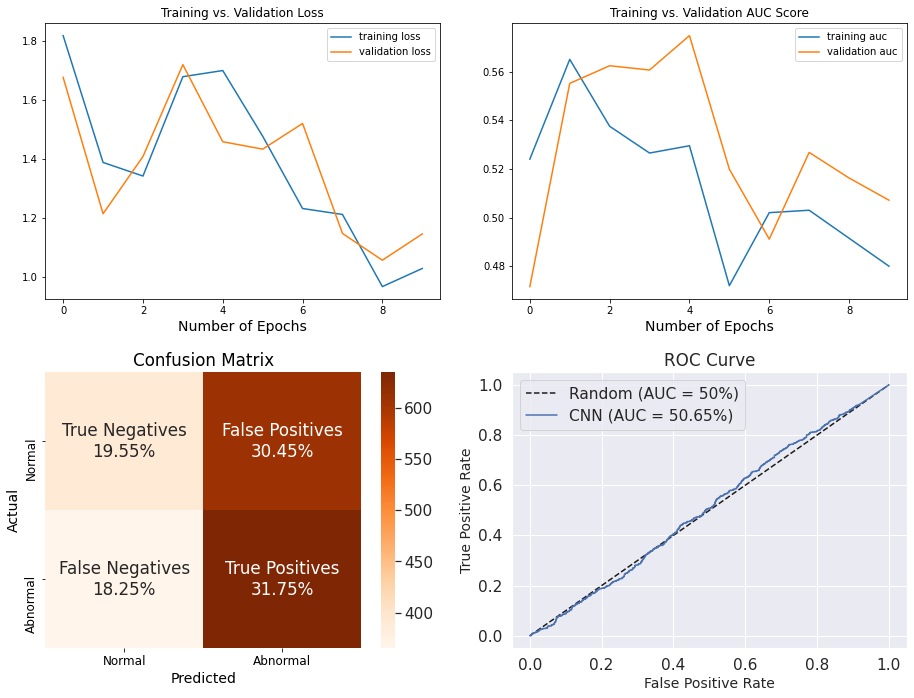

In [16]:
create_charts(model, history)